# HCV data

## Информация о наборе данных
### Что представляют экземпляры в этом наборе данных?

Экземпляры - это пациенты

### Дополнительная информация

Целевым атрибутом для классификации является категория (доноры крови в сравнении с Гепатитом С, включая прогрессирование: "просто" гепатит С, фиброз, цирроз печени).

### Есть пропущенные значения?

Да

# Код

Импортируем необходимые библиотеки и загружаем датасет.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('hcvdat0.csv')

In [ ]:
df


,ID,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,611,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,612,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,613,3=Cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,614,3=Cirrhosis,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


Выявляем дублирующиеся данные - их нет.

In [ ]:
df.duplicated().sum()

0

Проверяем наличие пропущенных значений - в описании датасета было указано, что они имеются.

In [ ]:
df.isna().sum()

ID           0
Category     0
Age          0
Sex          0
ALB          1
ALP         18
ALT          1
AST          0
BIL          0
CHE          0
CHOL        10
CREA         0
GGT          0
PROT         1
dtype: int64

Удаляем строки датафрейма с пропущенными значениями.

In [ ]:
df = df.dropna()
df.isna().sum(), df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 589 entries, 0 to 612
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        589 non-null    int64  
 1   Category  589 non-null    object 
 2   Age       589 non-null    int64  
 3   Sex       589 non-null    object 
 4   ALB       589 non-null    float64
 5   ALP       589 non-null    float64
 6   ALT       589 non-null    float64
 7   AST       589 non-null    float64
 8   BIL       589 non-null    float64
 9   CHE       589 non-null    float64
 10  CHOL      589 non-null    float64
 11  CREA      589 non-null    float64
 12  GGT       589 non-null    float64
 13  PROT      589 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 69.0+ KB


(ID          0
 Category    0
 Age         0
 Sex         0
 ALB         0
 ALP         0
 ALT         0
 AST         0
 BIL         0
 CHE         0
 CHOL        0
 CREA        0
 GGT         0
 PROT        0
 dtype: int64,
 None)

Удалим из датафрейма колонки данных, не влиящих на результат классификации данных, оставив только данные, полученные в лаботатории и целевой признак.

In [ ]:
del df['ID']
del df['Age']
del df['Sex']

In [ ]:
df

,Category,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0=Blood Donor,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0=Blood Donor,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0=Blood Donor,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0=Blood Donor,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0=Blood Donor,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...
608,3=Cirrhosis,34.0,46.4,15.0,150.0,8.0,6.26,3.98,56.0,49.7,80.6
609,3=Cirrhosis,39.0,51.3,19.6,285.8,40.0,5.77,4.51,136.1,101.1,70.5
610,3=Cirrhosis,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,3=Cirrhosis,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3


Интерпретируем целевой признак в формат int.

In [ ]:
# df.loc[df['Category'] == '0=Blood Donor', 'Category'] = 0
# df.loc[df['Category'] == '0s=suspect Blood Donor', 'Category'] = 1
# df.loc[df['Category'] == '1=Hepatitis', 'Category'] = 2
# df.loc[df['Category'] == '2=Fibrosis', 'Category'] = 3
# df.loc[df['Category'] == '3=Cirrhosis', 'Category'] = 4
# df['Category'] = df['Category'].astype('int64')

In [ ]:
from sklearn. preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='ignore')
encoder_values = encoder.fit_transform(df[['Category']]).toarray()
for i in range(encoder_values.shape[-1]):
  column_name = f'OHE_{i}'
  df[column_name] = encoder_values[:,i]
del df['Category']
df

<ipython-input-83-3114b0167ee0>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name] = encoder_values[:,i]
<ipython-input-83-3114b0167ee0>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name] = encoder_values[:,i]
<ipython-input-83-3114b0167ee0>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,OHE_0,OHE_1,OHE_2,OHE_3,OHE_4
0,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0,1.0,0.0,0.0,0.0,0.0
1,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5,1.0,0.0,0.0,0.0,0.0
2,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3,1.0,0.0,0.0,0.0,0.0
3,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7,1.0,0.0,0.0,0.0,0.0
4,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,34.0,46.4,15.0,150.0,8.0,6.26,3.98,56.0,49.7,80.6,0.0,0.0,0.0,0.0,1.0
609,39.0,51.3,19.6,285.8,40.0,5.77,4.51,136.1,101.1,70.5,0.0,0.0,0.0,0.0,1.0
610,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5,0.0,0.0,0.0,0.0,1.0
611,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3,0.0,0.0,0.0,0.0,1.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 589 entries, 0 to 612
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ALB     589 non-null    float64
 1   ALP     589 non-null    float64
 2   ALT     589 non-null    float64
 3   AST     589 non-null    float64
 4   BIL     589 non-null    float64
 5   CHE     589 non-null    float64
 6   CHOL    589 non-null    float64
 7   CREA    589 non-null    float64
 8   GGT     589 non-null    float64
 9   PROT    589 non-null    float64
 10  OHE_0   589 non-null    float64
 11  OHE_1   589 non-null    float64
 12  OHE_2   589 non-null    float64
 13  OHE_3   589 non-null    float64
 14  OHE_4   589 non-null    float64
dtypes: float64(15)
memory usage: 73.6 KB


In [ ]:
df


,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,OHE_0,OHE_1,OHE_2,OHE_3,OHE_4
0,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0,1.0,0.0,0.0,0.0,0.0
1,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5,1.0,0.0,0.0,0.0,0.0
2,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3,1.0,0.0,0.0,0.0,0.0
3,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7,1.0,0.0,0.0,0.0,0.0
4,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,34.0,46.4,15.0,150.0,8.0,6.26,3.98,56.0,49.7,80.6,0.0,0.0,0.0,0.0,1.0
609,39.0,51.3,19.6,285.8,40.0,5.77,4.51,136.1,101.1,70.5,0.0,0.0,0.0,0.0,1.0
610,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5,0.0,0.0,0.0,0.0,1.0
611,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3,0.0,0.0,0.0,0.0,1.0


In [ ]:
from sklearn.utils import shuffle
df = shuffle(df)
df = df.reset_index(drop=True)

In [ ]:
df

,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,OHE_0,OHE_1,OHE_2,OHE_3,OHE_4
0,44.7,56.4,20.9,24.2,17.5,5.49,5.65,74.0,28.5,75.0,1.0,0.0,0.0,0.0,0.0
1,42.9,71.1,15.0,34.8,9.3,8.39,6.64,89.0,14.5,75.5,1.0,0.0,0.0,0.0,0.0
2,41.8,65.0,33.1,38.0,6.6,8.83,4.43,71.0,24.0,72.7,1.0,0.0,0.0,0.0,0.0
3,39.7,96.5,54.8,30.8,3.3,8.98,5.66,82.0,52.4,65.8,1.0,0.0,0.0,0.0,0.0
4,40.2,37.1,30.1,25.1,10.2,9.69,4.93,103.0,20.7,71.9,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584,39.0,87.9,26.1,32.1,12.2,10.30,6.31,90.0,99.7,69.8,1.0,0.0,0.0,0.0,0.0
585,46.2,48.3,15.8,16.6,4.3,4.55,5.18,67.0,13.0,73.7,1.0,0.0,0.0,0.0,0.0
586,38.1,82.5,8.0,17.5,2.4,9.13,6.28,103.0,35.8,69.9,1.0,0.0,0.0,0.0,0.0
587,40.5,61.7,18.6,24.7,6.7,8.47,6.05,89.0,19.6,75.6,1.0,0.0,0.0,0.0,0.0


Создадим разбиение на тренировочную и тестовую выборки.

In [ ]:
X = np.array(df)

Исходное число кластеров, заданное явно по описанию датасета.

Проверка корреляции признаков.

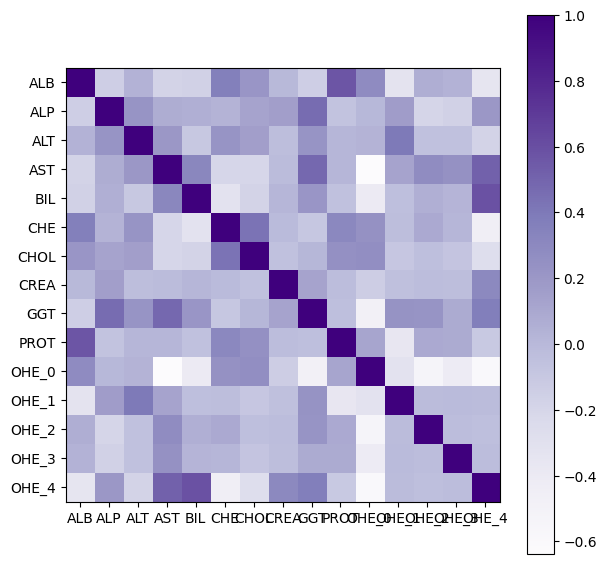

In [ ]:
corr_matrix = df.corr()
plt.figure(figsize=(7, 7))
plt.imshow(corr_matrix, cmap='Purples')
plt.colorbar()
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.yticks(range(len(corr_matrix)), corr_matrix.index);

Обучение и оценка при использовании метода KMeans - метод k средних значений - при использовании различного числа кластеров.

Silhouette Score — это широко используемый показатель для оценки качества результатов кластеризации. Он измеряет, насколько точка данных похожа на собственный кластер по сравнению с другими кластерами. Оценка варьируется от –1 до 1, где более высокое значение указывает на лучшую производительность кластеризации. Значение, близкое к 1, предполагает, что точки данных хорошо кластеризованы и правильно разделены, а значение, близкое к -1, указывает на то, что точки данных могли быть отнесены к неправильным кластерам. В коде Silhouette Score рассчитывается с помощью функции Silhouette_score().

In [ ]:
from sklearn.cluster import KMeans

num_clusters = 2
kmeans = KMeans(n_clusters = num_clusters).fit(X)
res_kmeans = kmeans.predict(X)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
kmeans_2 = KMeans(n_clusters = num_clusters + 1).fit(X)
res_kmeans_2 = kmeans_2.predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
kmeans_3 = KMeans(n_clusters = num_clusters + 2).fit(X)
res_kmeans_3 = kmeans_3.predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
kmeans_4 = KMeans(n_clusters = num_clusters + 3).fit(X)
res_kmeans_4 = kmeans_4.predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
kmeans_5 = KMeans(n_clusters = num_clusters + 4).fit(X)
res_kmeans_5 = kmeans_5.predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
from sklearn.metrics import silhouette_score

print(silhouette_score(X, res_kmeans)) #2
print(silhouette_score(X, res_kmeans_2)) #3
print(silhouette_score(X, res_kmeans_3)) #4
print(silhouette_score(X, res_kmeans_4)) #5
print(silhouette_score(X, res_kmeans_5)) #6

0.8517208011645688
0.8396633102175014
0.5540222174133412
0.46184027861726223
0.46312898211115383
